In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data_new = pd.read_csv("/kaggle/input/state-wise-power-consumption-in-india/dataset_tk.csv")
data_new.rename(columns={"Unnamed: 0":"Date"},inplace=True)
data_new['Date']=pd.to_datetime(data_new["Date"],dayfirst=True)
data_new.head()

,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [3]:
data_new.tail()

,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
498,2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,2020-12-04,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3
502,2020-12-05,120.4,111.2,201.4,83.6,287.3,35.2,24.3,42.6,3.5,...,95.1,110.4,1.2,2.1,20.3,2.5,5.8,1.6,2.1,3.3


In [4]:
data_new.shape

(503, 34)

In [5]:
data_new.columns

Index(['Date', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand',
       'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP',
       'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana', 'Karnataka',
       'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand', 'Odisha',
       'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype='object')

In [6]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               503 non-null    datetime64[ns]
 1   Punjab             503 non-null    float64       
 2   Haryana            503 non-null    float64       
 3   Rajasthan          503 non-null    float64       
 4   Delhi              503 non-null    float64       
 5   UP                 503 non-null    float64       
 6   Uttarakhand        503 non-null    float64       
 7   HP                 503 non-null    float64       
 8   J&K                503 non-null    float64       
 9   Chandigarh         503 non-null    float64       
 10  Chhattisgarh       503 non-null    float64       
 11  Gujarat            503 non-null    float64       
 12  MP                 503 non-null    float64       
 13  Maharashtra        503 non-null    float64       
 14  Goa       

In [7]:
data_new.describe()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,141.145527,138.333598,218.443340,83.380716,314.036382,36.157058,26.568191,44.264016,4.141551,83.877137,...,80.464612,138.708151,1.289463,2.109145,24.960040,2.494632,5.643738,1.706362,2.162425,4.085487
std,56.977361,38.106593,27.421615,25.915357,66.516960,6.705108,4.807040,4.769391,1.143422,10.130427,...,10.905131,27.849180,0.363565,0.231132,4.732684,0.223141,0.717257,0.144760,0.145174,0.751047
min,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,37.200000,...,51.100000,51.500000,0.300000,1.100000,12.200000,1.500000,3.300000,1.200000,1.400000,1.400000
25%,104.000000,114.800000,205.800000,63.500000,263.650000,33.800000,25.600000,41.550000,3.300000,75.700000,...,71.650000,114.650000,1.100000,2.000000,22.100000,2.400000,5.300000,1.600000,2.100000,3.500000
50%,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.100000,3.800000,82.600000,...,79.800000,131.200000,1.200000,2.200000,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000
75%,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,91.600000,...,88.400000,164.750000,1.400000,2.200000,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000
max,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,111.600000,...,113.000000,198.500000,2.800000,2.700000,38.000000,3.200000,6.900000,2.200000,2.700000,6.600000


In [8]:

data_new.isnull().sum()

Date                 0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
dtype: int64

In [9]:
data_new['Gujarat'].unique()

array([319.5, 316.7, 301.9, 313.2, 320.7, 319.4, 307.9, 260. , 268.3,
       275. , 294.1, 301.2, 305.6, 290.5, 299.5, 282. , 269.1, 260.2,
       273.8, 276.7, 263.5, 391.4, 385.3, 380.2, 380.6, 379.4, 377.9,
       362.8, 203.5, 212. , 217.1, 221.5, 224. , 229.7, 232.2, 215.2,
       229.6, 234.9, 261.5, 282.1, 278.5, 261.9, 317.3, 322.3, 321.8,
       326.9, 322.6, 319.9, 312.3, 385.7, 391.1, 389.9, 394.1, 392.8,
       393. , 376.2, 332.4, 338. , 330.5, 327.8, 330.4, 324. , 316.4,
       313. , 302.4, 305.7, 316.9, 323.9, 300.1, 277.2, 286.2, 291. ,
       294.3, 296.2, 292.6, 295.5, 334.9, 339.2, 336.5, 334.7, 336.7,
       333.5, 318.3, 351.5, 355.6, 357.6, 364.6, 366.5, 366.4, 350.5,
       326.2, 319.2, 314.6, 319.7, 340.6, 330.8, 340.2, 331.8, 328.2,
       356.3, 354.7, 347.2, 344.5, 362. , 361.6, 346.4, 326.4, 329.8,
       325.4, 324.4, 320.9, 317.6, 306.7, 317.2, 320.5, 312.7, 306.6,
       289.4, 279.2, 257.9, 342.2, 355.4, 354.3, 346.8, 338.8, 334.6,
       314.9, 381.2,

In [10]:
len(data_new['Gujarat'].unique())

403

In [11]:
data_new['Gujarat'].value_counts()

312.7    4
320.9    4
300.2    3
317.1    3
327.4    3
        ..
329.3    1
233.3    1
279.0    1
337.8    1
362.5    1
Name: Gujarat, Length: 403, dtype: int64

In [12]:
mean_temprature = data_new.mean().sort_values(ascending=False).reset_index().rename(columns = {"index": "state", 0 : "avg_consumption"})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


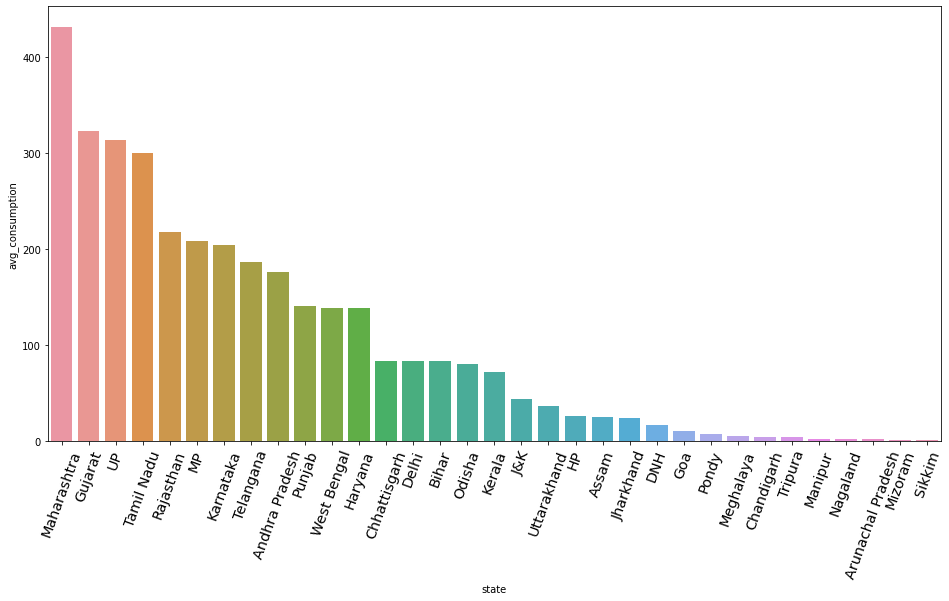

In [13]:
plt.figure(figsize=(16,8))
sns.barplot(x= "state", y = "avg_consumption", data = mean_temprature)
plt.xticks(rotation=70,fontweight='light', fontsize='x-large')
plt.show()

(array([  5.,  10.,  10.,  28.,  52.,  88., 160.,  59.,  57.,  34.]),
 array([192.3 , 213.15, 234.  , 254.85, 275.7 , 296.55, 317.4 , 338.25,
        359.1 , 379.95, 400.8 ]),
 <BarContainer object of 10 artists>)

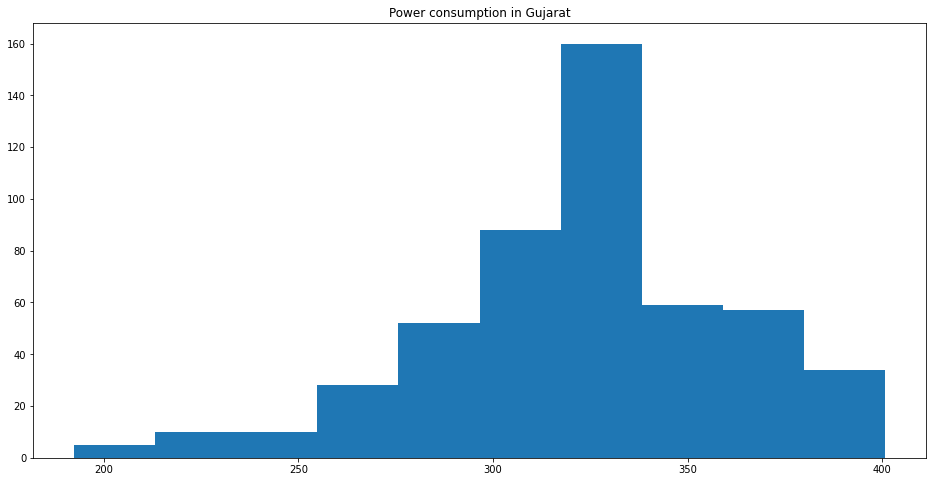

In [16]:
plt.figure(figsize=(16,8))
plt.title('Power consumption in Gujarat')
plt.hist(data_new.Gujarat)


In [17]:
power = data_new.drop( data_new.index[137:467] )
power

,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,2020-12-04,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


In [18]:
month = power.groupby(power['Date'].dt.strftime('%B')).sum()

In [19]:
month

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
Date,,,,,,,,,,,,,,,,,,,,,
April,4395.6,4140.7,6811.1,2397.3,8870.9,1105.9,835.1,1357.6,123.7,2510.6,...,2303.1,3948.7,41.4,63.2,704.0,74.0,173.3,50.5,63.5,116.7
August,997.2,935.0,1135.4,557.6,1979.3,196.9,147.5,204.7,26.1,426.2,...,437.1,784.2,5.3,11.2,160.3,12.8,26.8,9.1,11.4,23.6
December,644.8,622.6,1052.8,411.7,1612.8,184.7,128.7,221.4,18.8,509.4,...,537.7,772.7,6.7,10.4,109.9,11.8,27.7,8.1,10.2,15.9
February,3183.4,3385.7,5797.3,2110.9,8351.0,935.2,674.9,1224.1,106.4,2068.7,...,2177.4,3761.9,32.9,53.9,655.8,68.9,144.4,46.5,58.0,108.9
January,4436.5,4429.6,6240.9,2798.2,10253.7,1113.1,801.5,1301.8,131.3,2562.0,...,2391.0,4289.7,34.9,64.8,768.5,73.4,167.3,51.8,65.4,128.3
July,946.7,867.6,1084.3,503.6,1764.3,193.2,147.3,212.8,25.3,410.1,...,427.3,744.1,5.9,11.5,148.2,12.2,27.1,8.7,11.0,22.1
June,536.2,584.5,1096.4,314.4,1225.2,174.8,146.6,226.3,17.2,361.0,...,401.7,550.7,8.2,11.0,111.7,11.9,29.9,8.6,11.0,16.6
March,4170.5,4003.7,6417.9,2351.9,8977.0,1015.9,770.3,1304.1,119.4,2419.9,...,2340.9,3808.4,41.9,61.1,760.7,72.8,163.7,50.3,65.1,120.6
May,3957.9,3580.2,4896.6,2204.9,7453.0,871.2,623.9,922.5,109.4,2026.2,...,1907.0,3323.0,26.5,47.7,596.0,54.6,127.4,37.4,47.6,99.5


In [20]:
month1 = month.rename( columns = {'Month' : 'Date' })
month1

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
Date,,,,,,,,,,,,,,,,,,,,,
April,4395.6,4140.7,6811.1,2397.3,8870.9,1105.9,835.1,1357.6,123.7,2510.6,...,2303.1,3948.7,41.4,63.2,704.0,74.0,173.3,50.5,63.5,116.7
August,997.2,935.0,1135.4,557.6,1979.3,196.9,147.5,204.7,26.1,426.2,...,437.1,784.2,5.3,11.2,160.3,12.8,26.8,9.1,11.4,23.6
December,644.8,622.6,1052.8,411.7,1612.8,184.7,128.7,221.4,18.8,509.4,...,537.7,772.7,6.7,10.4,109.9,11.8,27.7,8.1,10.2,15.9
February,3183.4,3385.7,5797.3,2110.9,8351.0,935.2,674.9,1224.1,106.4,2068.7,...,2177.4,3761.9,32.9,53.9,655.8,68.9,144.4,46.5,58.0,108.9
January,4436.5,4429.6,6240.9,2798.2,10253.7,1113.1,801.5,1301.8,131.3,2562.0,...,2391.0,4289.7,34.9,64.8,768.5,73.4,167.3,51.8,65.4,128.3
July,946.7,867.6,1084.3,503.6,1764.3,193.2,147.3,212.8,25.3,410.1,...,427.3,744.1,5.9,11.5,148.2,12.2,27.1,8.7,11.0,22.1
June,536.2,584.5,1096.4,314.4,1225.2,174.8,146.6,226.3,17.2,361.0,...,401.7,550.7,8.2,11.0,111.7,11.9,29.9,8.6,11.0,16.6
March,4170.5,4003.7,6417.9,2351.9,8977.0,1015.9,770.3,1304.1,119.4,2419.9,...,2340.9,3808.4,41.9,61.1,760.7,72.8,163.7,50.3,65.1,120.6
May,3957.9,3580.2,4896.6,2204.9,7453.0,871.2,623.9,922.5,109.4,2026.2,...,1907.0,3323.0,26.5,47.7,596.0,54.6,127.4,37.4,47.6,99.5


In [21]:
month1['Gujarat']

Date
April        9792.0
August       1511.8
December     1867.4
February     8186.5
January      9191.9
July         1522.2
June         1660.6
March        9580.5
May          7242.2
November     1675.8
October      1654.5
September    1763.2
Name: Gujarat, dtype: float64

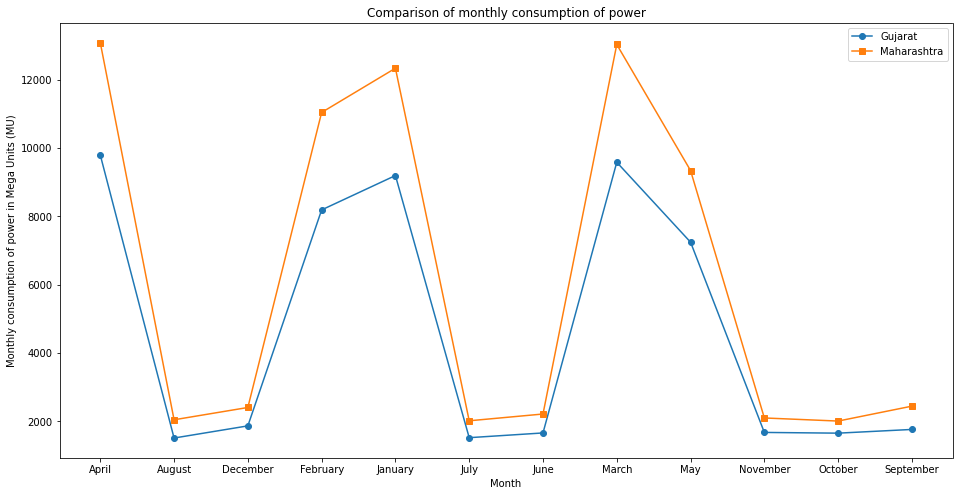

In [23]:
plt.figure(figsize=(16,8))
plt.plot(month1.Gujarat, marker = 'o');
plt.plot(month1.Maharashtra , marker = 's');

plt.xlabel('Month')
plt.ylabel('Monthly consumption of power in Mega Units (MU)')

plt.title("Comparison of monthly consumption of power")
plt.legend(['Gujarat' , 'Maharashtra']);

Data 2

In [24]:

data3=pd.read_csv("/kaggle/input/state-wise-power-consumption-in-india/long_data_.csv")


In [25]:
data3.describe()

,latitude,longitude,Usage
count,16599.000000,16599.000000,16599.000000
mean,23.178220,81.794533,103.001862
std,6.146575,7.258429,116.044056
min,8.900373,71.192400,0.300000
25%,19.820430,76.569993,6.700000
50%,23.835404,78.570026,64.400000
75%,27.333330,88.329947,173.900000
max,33.450000,94.216667,522.100000


In [26]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB


In [27]:
data3.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


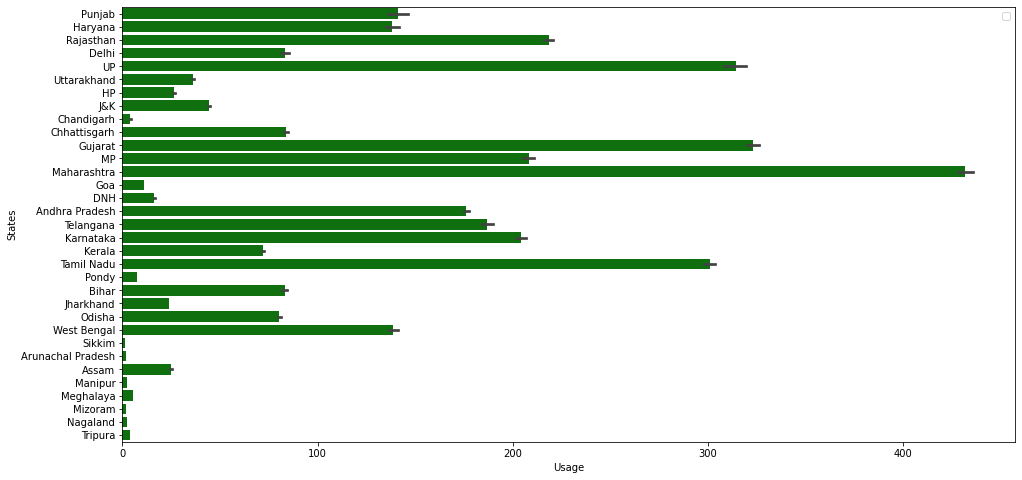

In [29]:
plt.figure(figsize=(16,8))
sns.barplot( x=data3["Usage"], y=data3["States"], color="green")
plt.legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Gujarat'),
  Text(1, 0, 'Pondy'),
  Text(2, 0, 'Andhra Pradesh'),
  Text(3, 0, 'Jharkhand'),
  Text(4, 0, 'Karnataka'),
  Text(5, 0, 'Rajasthan'),
  Text(6, 0, 'Sikkim'),
  Text(7, 0, 'Chandigarh'),
  Text(8, 0, 'Tamil Nadu'),
  Text(9, 0, 'Nagaland'),
  Text(10, 0, 'J&K'),
  Text(11, 0, 'Telangana'),
  Text(12, 0, 'UP'),
  Text(13, 0, 'Punjab'),
  Text(14, 0, 'Haryana')])

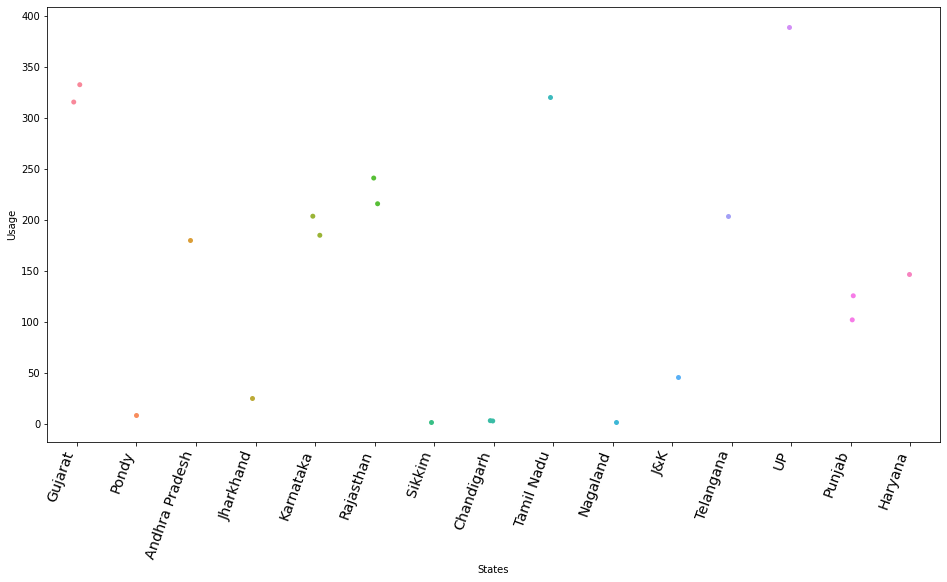

In [30]:
plt.figure(figsize=(16,8))
sns.stripplot(x="States", y="Usage", data=data3.sample(n=20))
plt.xticks(rotation=70, horizontalalignment='right', fontweight='light', fontsize='x-large')

(array([0]), [Text(0, 0, '')])

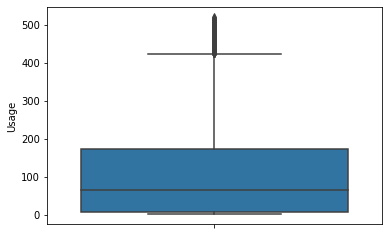

In [32]:
sns.boxplot(y="Usage", data=data3)
plt.xticks(rotation=70, horizontalalignment='right', fontweight='light', fontsize='x-large')

In [34]:
pie_df = data3.sample(n=5)
pie_df.head()

,States,Regions,latitude,longitude,Dates,Usage
5304,West Bengal,ER,22.580390,88.329947,16/06/2019 00:00:00,112.4
11369,Karnataka,SR,12.570381,76.919997,17/12/2019 00:00:00,237.7
6280,Gujarat,WR,22.258700,71.192400,12/07/2019 00:00:00,318.5
1004,DNH,WR,20.266578,73.016618,02/02/2019 00:00:00,1.3
14305,Telangana,SR,18.112400,79.019300,05/04/2020 00:00:00,220.9


In [40]:
data3['Dates']=pd.to_datetime(data3["Dates"],dayfirst=True)
data3["year"]=data3["Dates"].dt.year

In [41]:
data3.head()

,States,Regions,latitude,longitude,Dates,Usage,year
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,2019
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,2019
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,2019
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,2019
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,2019


In [42]:
data3.drop(["Dates"],axis=1,inplace=True)

In [43]:
data3.head()

,States,Regions,latitude,longitude,Usage,year
0,Punjab,NR,31.519974,75.980003,119.9,2019
1,Haryana,NR,28.450006,77.019991,130.3,2019
2,Rajasthan,NR,26.449999,74.639981,234.1,2019
3,Delhi,NR,28.669993,77.230004,85.8,2019
4,UP,NR,27.599981,78.050006,313.9,2019


In [44]:
year1 = data3.groupby(data3['year']).sum()
#sns.heatmap(data3['States'],data3['year'])

In [45]:
year1

,latitude,longitude,Usage
year,,,
2019,274592.375123,969019.837919,1216205.3
2020,110142.902556,388687.623009,493522.6


<AxesSubplot:title={'center':'Power consumption of states yearly'}, ylabel='year'>

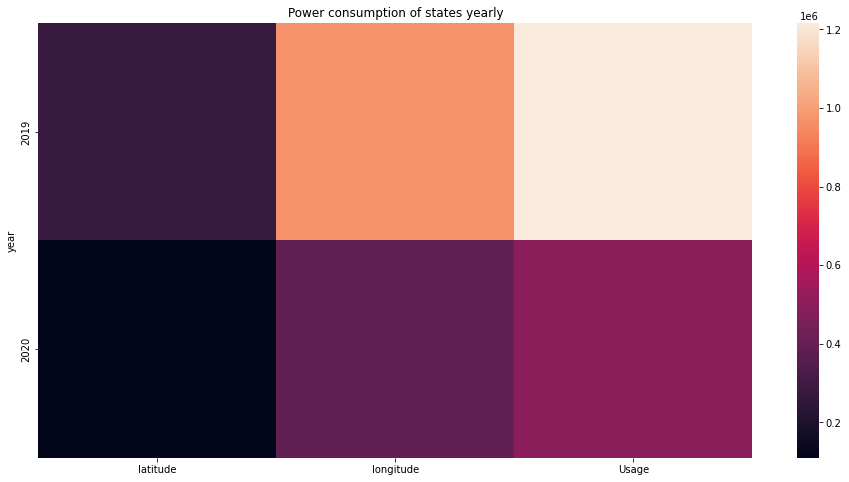

In [46]:
plt.figure(figsize=(16,8))
plt.title('Power consumption of states yearly')
sns.heatmap(year1)